# Heart Disease Prediction using SVM, Random Forest, Logistic Regression

### Importing Libraries

In [49]:
import pandas as pd #read file
import numpy as np #matrix multiplication
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

### Loading Dataset

In [2]:
df = pd.read_csv("HeartAttackDataset.csv",na_values='?') 
#na_values- any row with ? will get assihgned as a null value (NaN)
#later we'll remove any row with null values

In [3]:
df.head() #top 5 rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,NaN,NaN,NaN,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,NaN,NaN,NaN,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,NaN,NaN,6.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,NaN,NaN,NaN,0


In [4]:
df.tail() #last 5 rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
289,52,1,4,160.0,331.0,0.0,0.0,94.0,1.0,2.5,NaN,NaN,NaN,1
290,54,0,3,130.0,294.0,0.0,1.0,100.0,1.0,0.0,2.0,NaN,NaN,1
291,56,1,4,155.0,342.0,1.0,0.0,150.0,1.0,3.0,2.0,NaN,NaN,1
292,58,0,2,180.0,393.0,0.0,0.0,110.0,1.0,1.0,2.0,NaN,7.0,1
293,65,1,4,130.0,275.0,0.0,1.0,115.0,1.0,1.0,2.0,NaN,NaN,1


### Info of Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    293 non-null    float64
 4   chol        271 non-null    float64
 5   fbs         286 non-null    float64
 6   restecg     293 non-null    float64
 7   thalach     293 non-null    float64
 8   exang       293 non-null    float64
 9   oldpeak     294 non-null    float64
 10  slope       104 non-null    float64
 11  ca          3 non-null      float64
 12  thal        28 non-null     float64
 13  num         294 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 32.3 KB


In [6]:
df.isnull() #seeing null values present in the dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,False,False,False,False,False,False,False,False,False,False,True,True,True,False
1,False,False,False,False,False,False,False,False,False,False,True,True,True,False
2,False,False,False,False,True,False,False,False,False,False,True,True,True,False
3,False,False,False,False,False,False,False,False,False,False,True,True,False,False
4,False,False,False,False,False,False,False,False,False,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,False,False,False,False,False,False,False,False,False,False,True,True,True,False
290,False,False,False,False,False,False,False,False,False,False,False,True,True,False
291,False,False,False,False,False,False,False,False,False,False,False,True,True,False
292,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [7]:
df.isnull().sum() #checking is there are any null values

age             0
sex             0
cp              0
trestbps        1
chol           23
fbs             8
restecg         1
thalach         1
exang           1
oldpeak         0
slope         190
ca            291
thal          266
num             0
dtype: int64

In [8]:
df.describe() #shows the standard deviation for numerical column

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,294.000000,294.000000,294.000000,293.000000,271.000000,286.000000,293.000000,293.000000,293.000000,294.000000,104.000000,3.0,28.000000,294.000000
mean,47.826531,0.724490,2.982993,132.583618,250.848708,0.069930,0.218430,139.129693,0.303754,0.586054,1.894231,0.0,5.642857,0.360544
std,7.811812,0.447533,0.965117,17.626568,67.657711,0.255476,0.460868,23.589749,0.460665,0.908648,0.338995,0.0,1.615074,0.480977
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,1.000000,0.0,3.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,209.000000,0.000000,0.000000,122.000000,0.000000,0.000000,2.000000,0.0,5.250000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,243.000000,0.000000,0.000000,140.000000,0.000000,0.000000,2.000000,0.0,6.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,282.500000,0.000000,0.000000,155.000000,1.000000,1.000000,2.000000,0.0,7.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,3.000000,0.0,7.000000,1.000000


In [9]:
df = df.drop(columns = ["slope","ca","thal"],axis=1)
#dropping the columns slop,ca and thal
#when axis=0 > rows
#when axis=1 > columns

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,0


In [11]:
df = df.dropna() #will drop all the rows with null value

In [12]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,0
5,32,0,2,105.0,198.0,0.0,0.0,165.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160.0,331.0,0.0,0.0,94.0,1.0,2.5,1
290,54,0,3,130.0,294.0,0.0,1.0,100.0,1.0,0.0,1
291,56,1,4,155.0,342.0,1.0,0.0,150.0,1.0,3.0,1
292,58,0,2,180.0,393.0,0.0,0.0,110.0,1.0,1.0,1


In [13]:
df.isnull().sum() 
#observe that there are no null values in the dataset anymore

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
num           0
dtype: int64

In [14]:
df["sex"].value_counts() 
#checking how many males and female labels are present in the dataset

1    192
0     69
Name: sex, dtype: int64

In [15]:
df["cp"].value_counts()
#checking the number of records wrt the 4 types of chest pains

4    113
2     92
3     46
1     10
Name: cp, dtype: int64

In [16]:
df["restecg"].value_counts()

0.0    208
1.0     47
2.0      6
Name: restecg, dtype: int64

In [17]:
df["fbs"].value_counts()

0.0    242
1.0     19
Name: fbs, dtype: int64

### Dummies using Pandas to convert categorical value to one-hot encoding

We have to converting the categorical values(1,2,3,4) into one-hot encoding values because the ML Algo might get confused while processing the data.

So, the two catgorical columns where we have to do this: cp and restecg.

We know that there are 4 different values for cp values-- what dummies does is that it divides this four values into four columns wherein each column represents one cp value.

In [18]:
df = pd.get_dummies(df,columns= ["cp","restecg"])

In [19]:
df

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,num,cp_1,cp_2,cp_3,cp_4,restecg_0.0,restecg_1.0,restecg_2.0
0,28,1,130.0,132.0,0.0,185.0,0.0,0.0,0,0,1,0,0,0,0,1
1,29,1,120.0,243.0,0.0,160.0,0.0,0.0,0,0,1,0,0,1,0,0
3,30,0,170.0,237.0,0.0,170.0,0.0,0.0,0,1,0,0,0,0,1,0
4,31,0,100.0,219.0,0.0,150.0,0.0,0.0,0,0,1,0,0,0,1,0
5,32,0,105.0,198.0,0.0,165.0,0.0,0.0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,160.0,331.0,0.0,94.0,1.0,2.5,1,0,0,0,1,1,0,0
290,54,0,130.0,294.0,0.0,100.0,1.0,0.0,1,0,0,1,0,0,1,0
291,56,1,155.0,342.0,1.0,150.0,1.0,3.0,1,0,0,0,1,1,0,0
292,58,0,180.0,393.0,0.0,110.0,1.0,1.0,1,0,1,0,0,1,0,0


### Normalisation

In [21]:
df =df.rename(columns={"num       ":"target" }) #renaming the num col with spaces to target for easier access

In [22]:
#all the numericl=al values
numerical_cols = ["age","trestbps","chol","thalach","oldpeak"]
#finding the categorical columns by subtracting the list of all columns from the numerical value columns
cat_cols =  list(set(df.columns) - set (numerical_cols) - {"target"})
#we dot want to include target feature that will give us the predicted feature value

In [23]:
df["oldpeak"].value_counts()

0.0    165
1.0     36
2.0     28
1.5     15
3.0      9
2.5      3
0.5      2
0.8      1
4.0      1
5.0      1
Name: oldpeak, dtype: int64

In [24]:
#gives us the names of the columns
df.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'target', 'cp_1', 'cp_2', 'cp_3', 'cp_4', 'restecg_0.0', 'restecg_1.0',
       'restecg_2.0'],
      dtype='object')

In [25]:
cat_cols

['cp_4',
 'cp_3',
 'cp_1',
 'restecg_0.0',
 'cp_2',
 'fbs',
 'exang',
 'restecg_1.0',
 'sex',
 'restecg_2.0']

In [62]:
numerical_cols

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

### Splitting Data

In [27]:
df_train,df_test = train_test_split(df,test_size=0.2,random_state=42)

In [28]:
len(df_train), len(df_test)

(208, 53)

### Scaling the data

In [29]:
scaler = StandardScaler()

#features- input values
#target-output values
def get_features_and_target_values(df,numerical_cols,categorical_cols,scaler):
    x_numeric_scaled = scaler.fit_transform(df[numerical_cols]) #uses data point and SD+mean and transform the numerical column
    x_categorical =  df[cat_cols].to_numpy() #categorical cols
    x = np.hstack((x_categorical,x_numeric_scaled))
    y = df["target"]
    
    return x,y
    

In [30]:
x_train,y_train=get_features_and_target_values(df_train,cat_cols,numerical_cols,scaler)

In [31]:
x_test,y_test=get_features_and_target_values(df_train,cat_cols,numerical_cols,scaler)

### Logistic Regression Model

In [32]:
clf = LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

In [33]:
test_pred=clf.predict(x_test)

In [34]:
print("The mean squared error for Logistic Regression Model: ",mean_squared_error(y_test,test_pred))
 #y_test what the model has predicted
#error of 16% for Logistic Regression Model

The mean squared error for Logistic Regression Model:  0.16826923076923078


In [35]:
print("The accuracy fot Logistic Regression Model: ",accuracy_score(y_test,test_pred))
#accuracy of 83% for logistic Regression Model

The accuracy fot Logistic Regression Model:  0.8317307692307693


In [36]:
confusion_matrix(y_test,test_pred)

array([[121,   9],
       [ 26,  52]], dtype=int64)

### Decision Tree Classifier

In [37]:
dc_clf = tree.DecisionTreeClassifier()
dc_clf.fit(x_train,y_train)

dlf_pred=dc_clf.predict(x_test)


print("The mean squared error of the Decision Tree Classifier Model is: ",mean_squared_error(y_test,dlf_pred))
print("The accuracy score of the Decision Tree Classifier is : ",accuracy_score(y_test, dlf_pred))
#we observe a higher accuracy score with low error %

The mean squared error of the Decision Tree Classifier Model is:  0.12980769230769232
The accuracy score of the Decision Tree Classifier is :  0.8701923076923077


### Random Forest Classifier

In [38]:
rc_clf = RandomForestClassifier()
rc_clf.fit(x_train,y_train)

rc_pred=rc_clf.predict(x_test)

print("The mean squared error of the Random Forest Classifier Model is: ",mean_squared_error(y_test,rc_pred))
print("The accuracy score of the Random Forest Classifier is : ",accuracy_score(y_test, rc_pred))


The mean squared error of the Random Forest Classifier Model is:  0.12980769230769232
The accuracy score of the Random Forest Classifier is :  0.8701923076923077


### SVM 

In [39]:
#sample -> only for linear model
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)
y_pred = svclassifier.predict(x_test)

print("The mean squared error of the SVM is: ",mean_squared_error(y_test,rc_pred))
print("The accuracy score of the SVM is : ",accuracy_score(y_test, rc_pred))


The mean squared error of the SVM is:  0.12980769230769232
The accuracy score of the SVM is :  0.8701923076923077


In [52]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(x_train, y_train)
    svc_scores.append(svc_classifier.score(x_test, y_test))

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

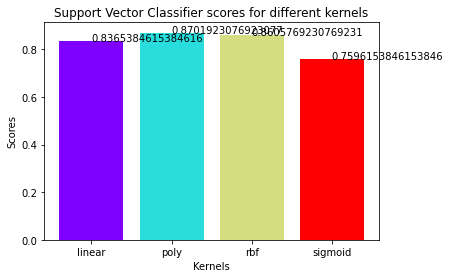

In [53]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

### KNN

In [46]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(x_train, y_train)
    knn_scores.append(knn_classifier.score(x_test, y_test))
    

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

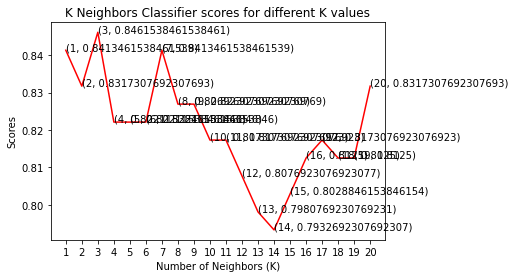

In [47]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')